<a href="https://colab.research.google.com/github/vemulashivanigoud/Mini-Project/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 1.91 ms (started: 2021-05-22 17:09:36 +00:00)


In [2]:
!pip install bing-image-downloader


time: 3.14 s (started: 2021-05-22 17:09:44 +00:00)


In [3]:
!mkdir images


time: 112 ms (started: 2021-05-22 17:09:50 +00:00)


In [4]:
from bing_image_downloader import downloader
downloader.download("black panther animal",limit=30,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://luida.l.u.pic.centerblog.net/o/e6754900.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.gratistodo.com/wp-content/uploads/2017/02/Pantera-Negra-wallpapers-6-800x500.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://usercontent1.hubstatic.com/9744356.png
[%] File Downloaded !

[%] Downloading Image #4 from https://evolvetours.com/wp-content/uploads/2015/03/Black-Jaguar-Roar.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://c1.staticflickr.com/3/2131/2089529530_a6323573dc_b.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://1.bp.blogspot.com/_KhexNhBizxg/SeQNwmXMDVI/AAAAAAAAAHA/aitc8JnCUdY/s320/pantera+negra+coon+suu+bebee+paanteraa!.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://media.istockphoto.com/photos/majestic-cougar-isolated-on-black-picture-id482165933?k=6&amp;m=482165933&amp;s=170667a&amp;w=0&amp;h=G3w3

In [5]:
downloader.download("pretty sunflower",limit=30,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/736x/c6/1b/18/c61b1856ff76e6d82a43b7ed8d104b32.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.profilerehab.com/facebook_covers/flowers/artistic_sunflower_cover_73.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://ohbestdayever.com/wp-content/uploads/2017/12/diy-sunflower-wedding-centerpiece-ideas.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.inkme.tattoo/wp-content/uploads/2017/07/flower-tattoos-090217270902173.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.hdwallpapers.in/download/sunflowers_landscape-1920x1080.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.deerpearlflowers.com/wp-content/uploads/2015/09/rustic-wedding-cupcake-table.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://i.pinimg.com/736x/eb/e5/e6/ebe5e6be6d9b2af9875283c6b88e5f2e.jpg
[%] File Downloaded

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

datadir = '/content/images'

categories = ['black panther animal','pretty sunflower'] 
target = []
images = []
flat_data = []

for category in categories:
  class_num = categories.index(category)
  path = os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))

    img_resize = resize(img_array,(150,150,3)) 
    flat_data.append(img_resize.flatten())
    images.append(img_resize)
    target.append(class_num)


flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


time: 8.42 s (started: 2021-05-22 17:12:00 +00:00)


In [7]:
flat_data[2]

array([0.26994771, 0.34509804, 0.2745098 , ..., 0.26538562, 0.24413725,
       0.21896732])

time: 10 ms (started: 2021-05-22 17:12:29 +00:00)


In [8]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 5.17 ms (started: 2021-05-22 17:12:32 +00:00)


<BarContainer object of 2 artists>

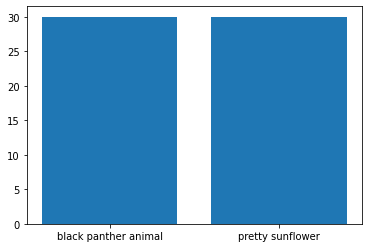

time: 203 ms (started: 2021-05-22 17:12:38 +00:00)


In [9]:
unique,count = np.unique(target,return_counts = True)
plt.bar(categories,count)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                test_size=0.3,random_state=106)

time: 209 ms (started: 2021-05-22 17:12:42 +00:00)


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
               {'C':[1,10,100,1000],'gamma':[0.001,0.0001], 'kernel':['rbf']},
]
svc = svm.SVC(probability =True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 33.9 s (started: 2021-05-22 17:12:48 +00:00)


In [12]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

time: 74.5 ms (started: 2021-05-22 17:13:28 +00:00)


In [13]:
y_test

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

time: 2.36 ms (started: 2021-05-22 17:13:30 +00:00)


In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix


time: 853 µs (started: 2021-05-22 17:13:33 +00:00)


In [15]:
accuracy_score(y_pred,y_test)

0.8333333333333334

time: 3.79 ms (started: 2021-05-22 17:13:36 +00:00)


In [16]:
confusion_matrix(y_pred,y_test)


array([[7, 1],
       [2, 8]])

time: 4.83 ms (started: 2021-05-22 17:13:46 +00:00)


In [17]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))


time: 23.4 ms (started: 2021-05-22 17:13:50 +00:00)


In [18]:
model = pickle.load(open('img_model.p','rb'))

time: 23.2 ms (started: 2021-05-22 17:13:53 +00:00)


Enter your urlhttps://images.indianexpress.com/2020/07/leopard_759_abhishek-pagnis.jpeg
(422, 759, 3)
Predicted output: black panther animal


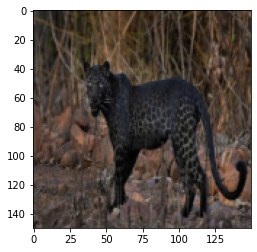

time: 25.5 s (started: 2021-05-22 17:21:58 +00:00)


In [22]:
flat_data=[]
url = input('Enter your url')
img = imread(url)
img_resize = resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f'Predicted output: {y_out}')
